# Predicting Housing Prices with Linear Regression

Source: https://www.kaggle.com/c/boston-housing

## Housing Values in Suburbs of Boston
The ***medv*** variable is the target variable.  

## Data description

The Boston data frame has 506 rows and 14 columns.  

This data frame contains the following columns:  

**crim**  
per capita crime rate by town.

**zn**  
proportion of residential land zoned for lots over 25,000 sq.ft.  

**indus**  
proportion of non-retail business acres per town.  

**chas**  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).  

**nox**  
nitrogen oxides concentration (parts per 10 million).  

**rm**
average number of rooms per dwelling.  

**age**  
proportion of owner-occupied units built prior to 1940.  

**dis**  
weighted mean of distances to five Boston employment centres.  

**rad**  
index of accessibility to radial highways.  

**tax**
full-value property-tax rate per \$10,000.  

**ptratio**  
pupil-teacher ratio by town.   

**black**  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.  

**lstat**  
lower status of the population (percent).  

**medv**  
median value of owner-occupied homes in \$1000s.  

Question: Build a linear regression model using Boston Housing dataset. You can download dataset directly from Kaggle or load from sklearn library.  

Hint: Loading from sklearm library and save into a pandas dataframe 

from sklearn.datasets import load_boston  
import pandas as pd  
boston = load_boston()  
df = pd.DataFrame(boston.data)  


In [18]:
#import libraries
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
df = pd.DataFrame(boston.data)

In [19]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [23]:
df.columns = boston.feature_names
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
df['House_Price'] = boston.target
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.isnull().values.any()

False

In [5]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


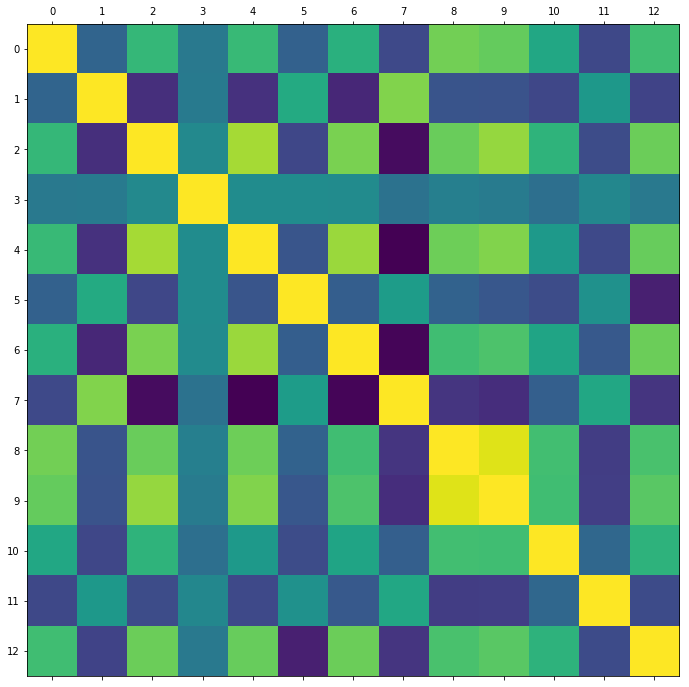

In [10]:
import matplotlib.pyplot as plt 
def plot_corr(df, size=12):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))#The subplots command in the background will call plt.figure(), and any keywords will be passed along
    ax.matshow(corr)   # heatmap with matshow, color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks
    
plot_corr(df)

In [26]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#Check R-square on training data
print(linear_model.score(X_train, y_train))

# Predicting the Test set results
y_predict = linear_model.predict(X_test)

0.6713466169624294


In [14]:
y_predict

array([ 5.48154216, 17.0806026 , 12.56125311, 22.44606612, 10.28381502,
       12.64634228, 13.28254272, 11.80066557, 15.32321533, 15.7746666 ,
       30.3583735 , 18.93969203, 16.54183466, 25.82643574,  7.33816124,
        2.4819131 , 12.71720074,  3.07270982,  6.30440546, 10.62911162,
        9.21693877, 16.8843142 , 13.87660141,  7.43656476, 10.42894222,
       30.24708487, 15.04018572, 19.3161048 ,  3.30650598, 14.43399333,
       16.83016334, 15.81080819, 12.45500834, 11.3410162 , 11.35240079,
       16.95735273, 20.04372284, 17.05268666, 17.78601774, 17.1522892 ,
        7.32563355,  9.93178454,  7.6603952 , 19.91581869,  7.95252475,
       11.1847217 , 12.25842947, 15.81562566, 21.55549107, 10.68220156,
       17.10799806, 10.81191253, 12.36571139, -2.91099951, 19.5094518 ,
        9.96745142, 10.0148702 , 10.9584659 , 28.17063337, 14.2143809 ,
        8.23986667, 11.36907477,  3.43698692,  5.73176981, 15.45818075,
        6.09680283, 14.75916442, 12.65793583, 16.72264284,  9.07